### Exploring Images with Python

Step 1: Importing the Tools
1. **Loading and Preparing the Image:**
    - In this notebook, we are going to use Python to explore images. Don't worry if some of these words seem big; we'll break it down!

    Reads an image named 'output.png'.
    Converts the image to RGB format.

2. **Splitting into RGB Channels:**
    - We are using some special tools (libraries) in Python to look at pictures! Imagine we have a magic box that can understand pictures and tell us interesting things about them.

    Splits the RGB image into its Red, Green, and Blue components.

3. Creating a 3D Plot for RGB Space:**
    numpy: It helps us do math stuff easily.
    cv2: This is like a magic lens that helps us see and understand pictures.
    matplotlib: Think of this as an art kit. We use it to draw and show pictures.
    plotly.express: Another tool to help us visualize things in a cool way.
    %matplotlib inline: This tells our magic box to show pictures right here, in our notebook!

        Sets up a figure with two side-by-side subplots.
        In the first subplot, it creates a 3D scatter plot representing the RGB color space.
        Each point in the plot corresponds to a pixel, and its color is determined by its RGB values.
        The colors are normalized and mapped to a range (-1 to 1) for better visualization.

4. Converting to HSV and Plotting:**
    - Now that we have our tools ready, let's use them to explore an image. We'll look at different aspects of the image, like its colors.

    Converts the RGB image to HSV (Hue, Saturation, Value) color space.
    In the second subplot, it creates a 3D scatter plot representing the HSV color space.
    Similar to the RGB plot, each point represents a pixel, and its color is determined by its HSV values.

5. **Displaying the Plots:**
    - Finally, it shows the figure with both RGB and HSV plots side by side.

    This code essentially visualizes how the colors are distributed in the image, both in the RGB and HSV color spaces, using 3D scatter plots. It's a cool way to explore and understand the color composition of an image.

In [1]:
#Import the Lib

import cv2
import dlib
import matplotlib
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from colorsys import rgb_to_hls, hls_to_rgb

# Config the params that show the img in graphics

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

%matplotlib inline

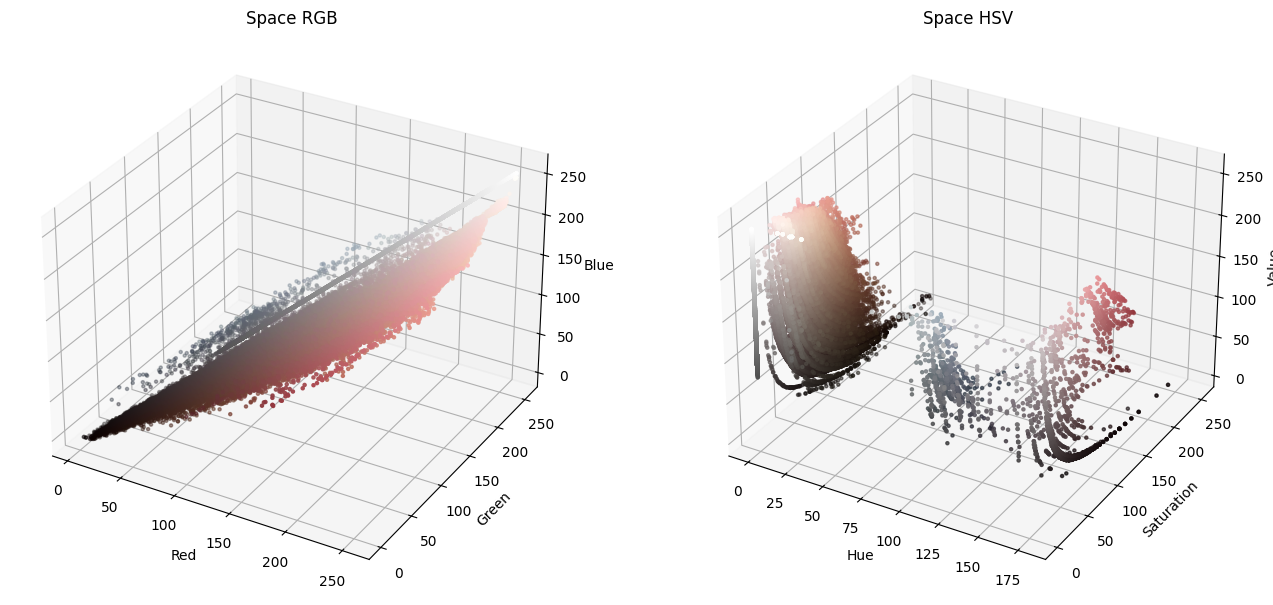

In [2]:
# the img

skin = cv2.imread('humanae.jpg')
skin = cv2.cvtColor(skin, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(skin)

#create the fig that show 2 subplots
fig = plt.figure(figsize=(16, 8))

# plot Rgb
axis_rgb = fig.add_subplot(1, 2, 1, projection="3d")
pixel_colors = skin.reshape((np.shape(skin)[0] * np.shape(skin)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis_rgb.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis_rgb.set_xlabel("Red")
axis_rgb.set_ylabel("Green")
axis_rgb.set_zlabel("Blue")
axis_rgb.set_title("Space RGB")

# Convert to HSV and plot

hsv_skin = cv2.cvtColor(skin, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_skin)

axis_hsv = fig.add_subplot(1, 2, 2, projection="3d")
axis_hsv.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker= ".")
axis_hsv.set_xlabel("Hue")
axis_hsv.set_ylabel("Saturation")
axis_hsv.set_zlabel("Value")
axis_hsv.set_title("Space HSV")

plt.show()

6. **Calculating Mean Values:**
    - We're trying to find out what color is the 'average' color in our picture. It's like asking, "If we mix all the colors together, what color will we get?"

    Computes the mean (average) values for Red, Green, and Blue channels of the image.
    Creating an Image with the Average Color:

7. **Combines the mean values into an array representing the average color.**
    - We check how much red, green, and blue we have in our picture. Then, we mix them together and find the average amounts.

    Creates a new image (100x100 pixels) filled entirely with the calculated average color.
    Displaying the Original Image:

8. **Sets up a subplot on the left side.**
    - Now that we know the 'average' color, we make a special picture where every pixel is filled with this color.

    Shows the original image in this subplot.
    Displaying the Image with Average Color:

9. **Sets up another subplot on the right side.**
    - We show the original picture on one side and our new picture with the 'average' color on the other side. It's like looking at two pictures and saying, "See, this is how all the colors blend together!"

    Shows the newly created image with the average color in this subplot.
    Showing the Plots:

Displays both subplots side by side.

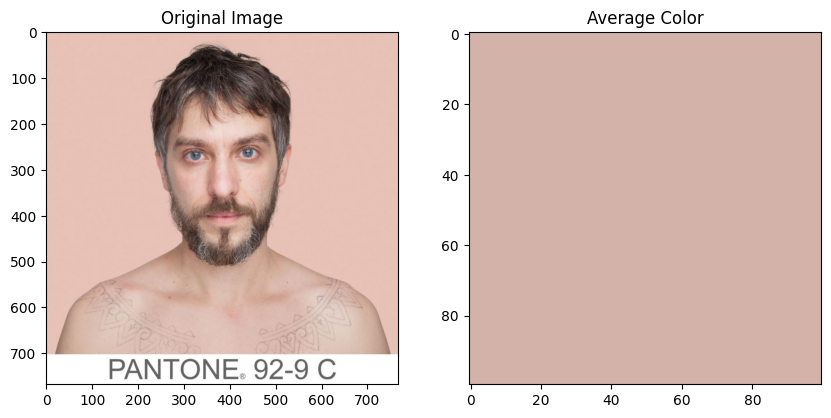

In [3]:
# Calculate the mean values
mean_r = np.mean(r)
mean_g = np.mean(g)
mean_b = np.mean(b)
# Create an image with the average color
avg_color = np.uint8([[[mean_r, mean_g, mean_b]]])
avg_color_img = np.full((100, 100, 3), avg_color)

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(skin)
plt.title('Original Image')

# Display the image with average color
plt.subplot(1, 2, 2)
plt.imshow(avg_color_img)
plt.title('Average Color')

plt.show()

### Finding the Magical Average Color in HSV

10. **Calculating Mean Values for HSV:**
    - Computes the mean (average) values of Hue (mean_h), Saturation (mean_s), and Value (mean_v) channels in the HSV image.
    
    We're still on our color detective mission! This time, we're exploring a magical color language called HSV. It's like finding out how much 'Hue,' 'Saturation,' and 'Value' we have in our picture.

11. **Creating a Magical Picture:**
    - Combines the calculated mean values into an array representing a color in HSV.
    - Creates a new image filled with this mean color using np.full_like.
    - Converts the HSV image to RGB for display.
    
    We take the average 'Hue,' 'Saturation,' and 'Value' values and mix them together in a magical potion! This potion helps us create a new picture where every pixel speaks this special color language.

12. **Displaying the Original Picture:**
    - Sets up a subplot with two columns and one row.
    - In the first subplot (left), displays the original image.

    Just like before, we show the original picture on one side. It's like looking at the world through our normal eyes.

13. **Displaying the Magical Picture:**
    - In the second subplot (right), displays the newly created image with the mean color.

    On the other side, we reveal our magical picture with the 'average' color in HSV. It's like looking at the world through magical glasses that understand a special color language.

14. **Side-by-Side Comparison:**
    - Shows the images side by side for comparison.
    
    Now, we have both pictures side by side. One is from our normal eyes, and the other is from our magical color adventure. It's like saying, "Look at these amazing colors we discovered using our magical color language!"


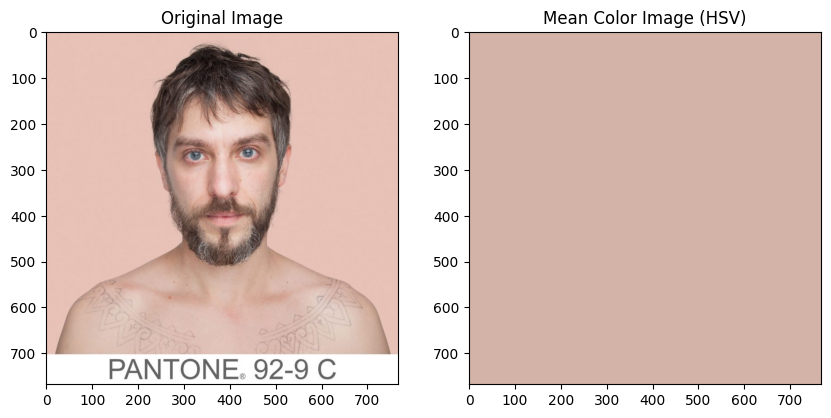

In [4]:
# Calculate the mean values for each channel
mean_h = np.mean(h)
mean_s = np.mean(s)
mean_v = np.mean(v)

# Create a new image with the mean color in HSV
mean_hsv_color = np.array([mean_h, mean_s, mean_v], dtype=np.uint8)
mean_hsv_color_image = cv2.cvtColor(np.full_like(skin, mean_hsv_color), cv2.COLOR_HSV2RGB)

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(skin)
plt.title('Original Image')

# Display the image with the mean color in HSV
plt.subplot(1, 2, 2)
plt.imshow(mean_hsv_color_image)
plt.title('Mean Color Image (HSV)')

plt.show()

### Calculating Brightness Magic:

15. **Calculating Brightness Magic:**
    - Computes the mean (average) values of Hue (mean_h), Saturation (mean_s), and Value (mean_v) channels in the HSV image.
    - Creates two additional images, one with the maximum and one with the minimum values in the Value channel.
    
    We're still detectives, but this time we're uncovering the magic of brightness! We find out the average brightness values and also the brightest and darkest spots in our picture.
    
16. **Creating Magical Brightness Pictures:**
     - Determines the maximum (max_v) and minimum (min_v) values in the Value channel.
     
    With the average brightness, we create a magical picture that captures the overall brightness mood. We also make pictures that show the brightest and darkest spots separately.
 
17. **Showing the Magic:**
    - Sets up a subplot with two rows and two columns.
    - Displays the original image, the mean color image, the image with the maximum Value, and the image with the minimum Value, side by side for comparison.
    
    We display our original picture on one side and our magical pictures showing average, brightest, and darkest spots on the other side. It's like saying, "Look at the different brightness moods we found in our magical world!"

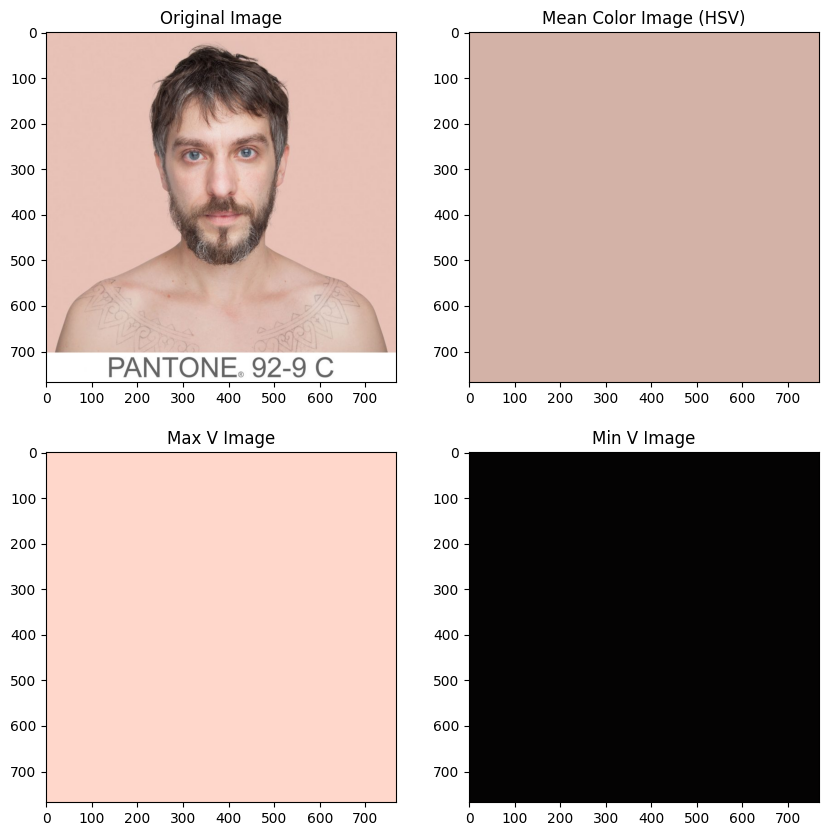

In [5]:
# Calculate the maximum and minimum values in the Value channel
max_v = np.max(v)
min_v = np.min(v)

# Create a new image with the mean color in HSV
mean_hsv_color = np.array([mean_h, mean_s, mean_v], dtype=np.uint8)
mean_hsv_color_image = cv2.cvtColor(np.full_like(skin, mean_hsv_color), cv2.COLOR_HSV2RGB)

# Create images with the maximum and minimum values in V
max_v_color = np.array([mean_h, mean_s, max_v], dtype=np.uint8)
min_v_color = np.array([mean_h, mean_s, min_v], dtype=np.uint8)

max_v_image = cv2.cvtColor(np.full_like(skin, max_v_color), cv2.COLOR_HSV2RGB)
min_v_image = cv2.cvtColor(np.full_like(skin, min_v_color), cv2.COLOR_HSV2RGB)

# Display the original image and the mean color image
plt.subplot(2, 2, 1)
plt.imshow(skin)
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(mean_hsv_color_image)
plt.title('Mean Color Image (HSV)')

# Display the images with the maximum and minimum values in V
plt.subplot(2, 2, 3)
plt.imshow(max_v_image)
plt.title('Max V Image')

plt.subplot(2, 2, 4)
plt.imshow(min_v_image)
plt.title('Min V Image')

plt.show()

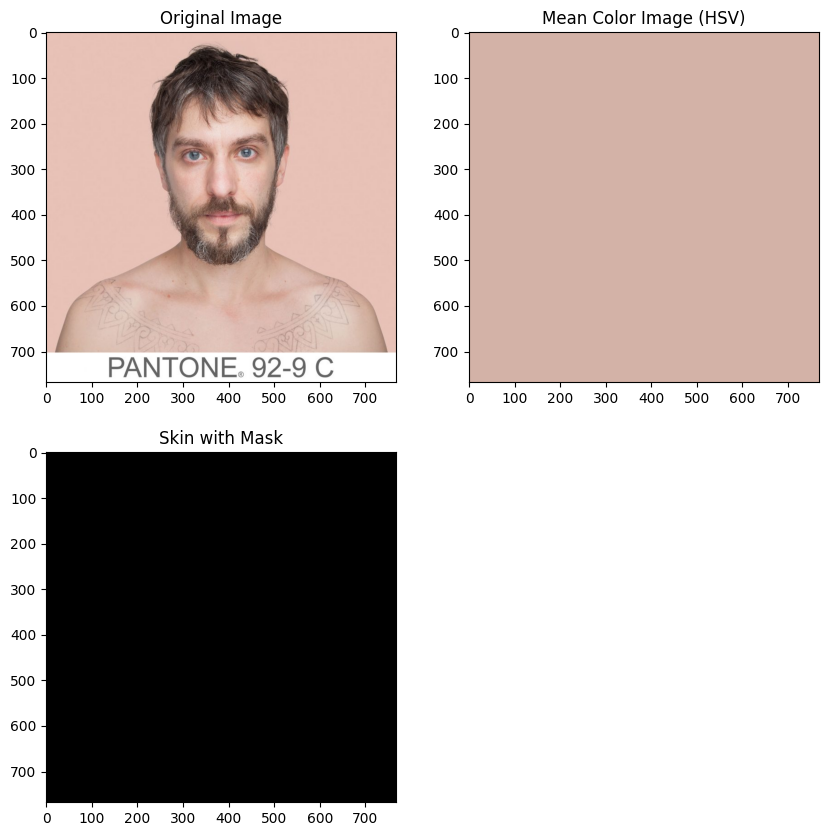

In [6]:
# Define a range around the mean HSV values for skin color
lower_skin = np.array([mean_h - 10, mean_s - 20, mean_v - 20], dtype=np.uint8)
upper_skin = np.array([mean_h + 10, mean_s + 20, mean_v + 20], dtype=np.uint8)

# Create a mask based on the range
mask = cv2.inRange(hsv_skin, lower_skin, upper_skin)

# Apply the mask to the original image
skin_with_mask = cv2.bitwise_and(skin, skin, mask=mask)

# Display the original image, the mean color image, and the masked image
plt.subplot(2, 2, 1)
plt.imshow(skin)
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(mean_hsv_color_image)
plt.title('Mean Color Image (HSV)')

plt.subplot(2, 2, 3)
plt.imshow(skin_with_mask)
plt.title('Skin with Mask')

plt.show()

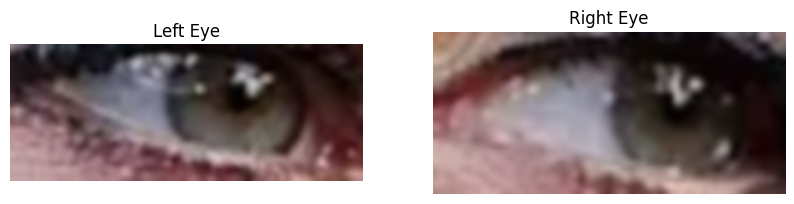

In [15]:
def crop_eyes_with_landmarks(image_path):
    # Load the image
    img = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Initialize the face detector and facial landmarks predictor from dlib
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("./shape_predictor_68_face_landmarks.dat")  # You need to download this file

    # Detect faces in the image
    faces = detector(gray)

    # Iterate over detected faces
    for face in faces:
        # Predict facial landmarks
        landmarks = predictor(gray, face)

        # Extract landmarks for left and right eyes
        left_eye_pts = np.array([(landmarks.part(i).x, landmarks.part(i).y) for i in range(36, 42)])
        right_eye_pts = np.array([(landmarks.part(i).x, landmarks.part(i).y) for i in range(42, 48)])

        # Get the bounding box for the eyes
        left_eye_rect = cv2.boundingRect(left_eye_pts)
        right_eye_rect = cv2.boundingRect(right_eye_pts)

        # Crop the eyes from the image
        left_eye_crop = img[left_eye_rect[1]:left_eye_rect[1]+left_eye_rect[3],
                            left_eye_rect[0]:left_eye_rect[0]+left_eye_rect[2]]
        right_eye_crop = img[right_eye_rect[1]:right_eye_rect[1]+right_eye_rect[3],
                             right_eye_rect[0]:right_eye_rect[0]+right_eye_rect[2]]

        # Display the cropped eyes
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(left_eye_crop, cv2.COLOR_BGR2RGB), interpolation='bicubic')
        plt.title('Left Eye')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(right_eye_crop, cv2.COLOR_BGR2RGB), interpolation='bicubic')
        plt.title('Right Eye')
        plt.axis('off')

        plt.show()

# Example usage
image_path = "scarlet.png"
crop_eyes_with_landmarks(image_path)

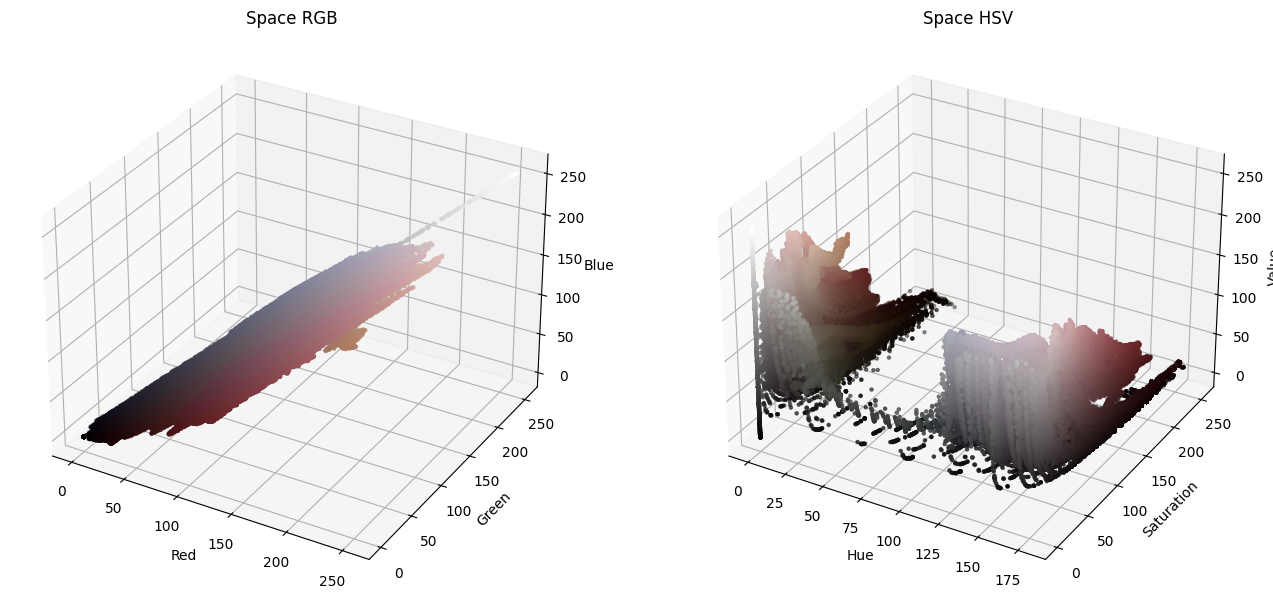

In [24]:
# the img

skin = cv2.imread('left_eye_1.png')
skin = cv2.cvtColor(skin, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(skin)

#create the fig that show 2 subplots
fig = plt.figure(figsize=(16, 8))

# plot Rgb
axis_rgb = fig.add_subplot(1, 2, 1, projection="3d")
pixel_colors = skin.reshape((np.shape(skin)[0] * np.shape(skin)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis_rgb.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis_rgb.set_xlabel("Red")
axis_rgb.set_ylabel("Green")
axis_rgb.set_zlabel("Blue")
axis_rgb.set_title("Space RGB")

# Convert to HSV and plot

hsv_skin = cv2.cvtColor(skin, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_skin)

axis_hsv = fig.add_subplot(1, 2, 2, projection="3d")
axis_hsv.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker= ".")
axis_hsv.set_xlabel("Hue")
axis_hsv.set_ylabel("Saturation")
axis_hsv.set_zlabel("Value")
axis_hsv.set_title("Space HSV")

plt.show()

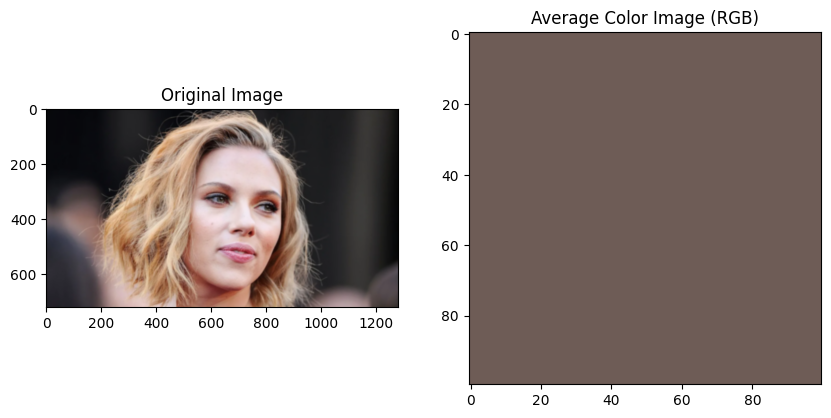

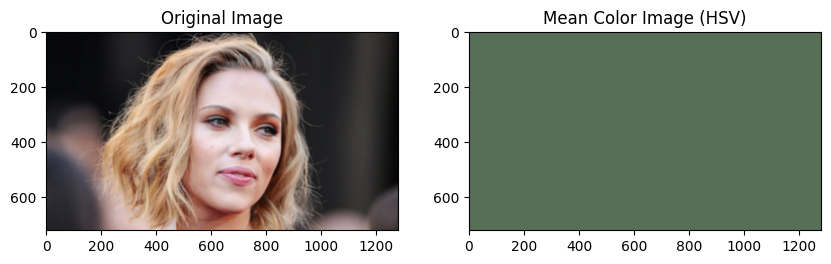

In [22]:
# Calculate the mean values
mean_r = np.mean(r)
mean_g = np.mean(g)
mean_b = np.mean(b)
# Create an image with the average color
avg_color = np.uint8([[[mean_r, mean_g, mean_b]]])
avg_color_img = np.full((100, 100, 3), avg_color)

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(skin, interpolation='bicubic')
plt.title('Original Image')

# Display the image with average color
plt.subplot(1, 2, 2)
plt.imshow(avg_color_img)
plt.title('Average Color Image (RGB)')

plt.show()


# Calculate the mean values for each channel
mean_h = np.mean(h)
mean_s = np.mean(s)
mean_v = np.mean(v)

# Create a new image with the mean color in HSV
mean_hsv_color = np.array([mean_h, mean_s, mean_v], dtype=np.uint8)
mean_hsv_color_image = cv2.cvtColor(np.full_like(skin, mean_hsv_color), cv2.COLOR_HSV2RGB)

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(skin, interpolation='bicubic')
plt.title('Original Image')

# Display the image with the mean color in HSV
plt.subplot(1, 2, 2)
plt.imshow(mean_hsv_color_image)
plt.title('Mean Color Image (HSV)')

plt.show()

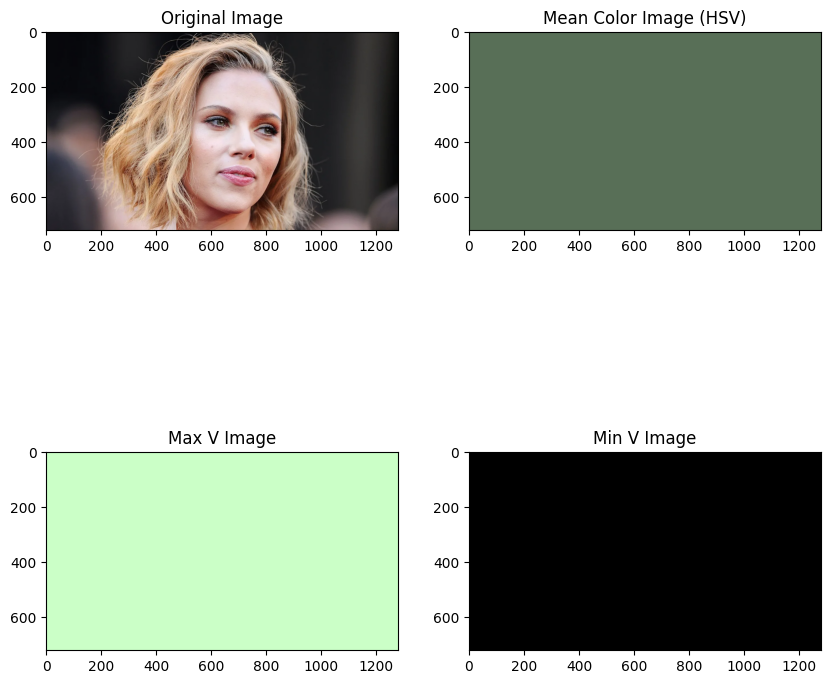

In [23]:
# Calculate the maximum and minimum values in the Value channel
max_v = np.max(v)
min_v = np.min(v)

# Create a new image with the mean color in HSV
mean_hsv_color = np.array([mean_h, mean_s, mean_v], dtype=np.uint8)
mean_hsv_color_image = cv2.cvtColor(np.full_like(skin, mean_hsv_color), cv2.COLOR_HSV2RGB)

# Create images with the maximum and minimum values in V
max_v_color = np.array([mean_h, mean_s, max_v], dtype=np.uint8)
min_v_color = np.array([mean_h, mean_s, min_v], dtype=np.uint8)

max_v_image = cv2.cvtColor(np.full_like(skin, max_v_color), cv2.COLOR_HSV2RGB)
min_v_image = cv2.cvtColor(np.full_like(skin, min_v_color), cv2.COLOR_HSV2RGB)

# Display the original image and the mean color image
plt.subplot(2, 2, 1)
plt.imshow(skin)
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(mean_hsv_color_image)
plt.title('Mean Color Image (HSV)')

# Display the images with the maximum and minimum values in V
plt.subplot(2, 2, 3)
plt.imshow(max_v_image)
plt.title('Max V Image')

plt.subplot(2, 2, 4)
plt.imshow(min_v_image)
plt.title('Min V Image')

plt.show()